## Downloading the Libraries that are required: 

We have already installed all the packages that we need to use in this assignment for the previous one except of seaborn. We install it by running the command `pip install seaborn` in cmd

## We import the libraries needed for the assignment

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit

# pip install xlrd

## 1. Exploration of Historical Trends

The first thing we have to do is read the source.xlsx file and save the dataframe using pandas.

In [42]:
df = pd.read_excel('source.xlsx') # read excel file
display(df.head())

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,205,Slovenian independence,Slovenia,1990,1991,Yugoslavian rule,1,0,0,0,...,0,275,900000.0,0.450129,1,1,1.0,0.0,1,0
1,33,pro-democracy movement,Argentina,1977,1983,military junta,1,0,0,0,...,0,2415,9000000.0,0.302013,1,0,1.0,0.0,1,0
2,249,Zambian independence movement,Zambia,1961,1963,British rule,1,0,0,0,...,0,913,1000000.0,0.285063,0,1,0.0,0.0,0,0
3,53,Cedar Revolution,Lebanon,2005,2005,Syrian forces,1,0,0,0,...,0,70,1000000.0,0.250824,1,0,0.0,1.0,1,0
4,321,Lebanon Political Crisis,Lebanon,2006,2008,Government of Prime Minister Fouad Siniora,1,0,0,0,...,0,545,800000.0,0.194598,1,1,1.0,0.0,1,1


Now, since we need to calculate the non violent and violent occurencies per decade, we will have to create a new column, decade, which is going to be calculated by the end-year. After doing that, we will also group by the data by decade, save that and keep only the columns neccecary to new dataframe, for simplicity reasons.

In [43]:
df['DECADE'] = (df['EYEAR'] // 10) * 10

df_grouped = df.groupby(['DECADE', 'VIOL']).size().unstack(fill_value=0).reset_index()
df_grouped.columns = ['DECADE','NON VIOLENT','VIOLENT']


Now the last thing we need to do is save the columns we need to variables (optional, but doing it for better readability) and with these variables we create the stackplot. For this plot, we use the `sns.set(style="whitegrid")` just so we can have the white lines in the plot and match exactly the example given to us. Also, we add the legend to the upper left and we set the xlim for the exact same reason (matching the example)

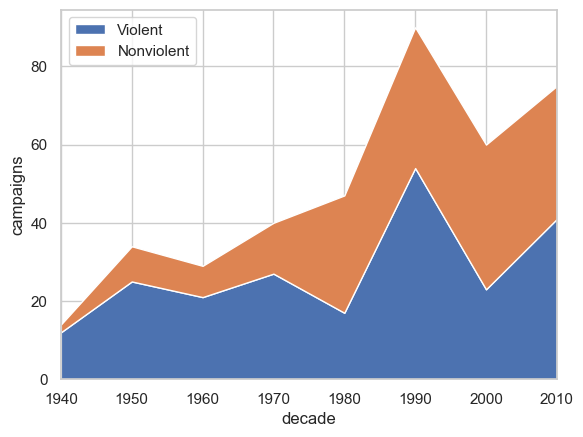

In [44]:

# Creating a stack plot

decades = df_grouped['DECADE']
nonviolent = df_grouped['NON VIOLENT']
violent = df_grouped['VIOLENT']

sns.set(style="whitegrid")
plt.stackplot(decades, violent, nonviolent, labels=['Violent', 'Nonviolent'])
plt.grid(True)
# Adding labels and title
plt.xlabel('decade')
plt.ylabel('campaigns')
plt.legend(loc='upper left')

plt.xlim(min(decades), max(decades))

# Display the plot
plt.show()

Now for the second plot since we want to calculate the percentage of success of non violent campaigns per decade and their number, the first thing we need to do is separate the data accordingly.

First of all, we want to get the campaigns that were successful and non violent per decade, we do that below by getting these campaigns and we are grouping them by their decade so we can get the amount and save it to a new dataframe called `success_by_decade`.

In [45]:
success_by_decade = df[(df['SUCCESS'] == 1) & (df['VIOL'] == 0)]
success_by_decade = success_by_decade.groupby('DECADE').size().reset_index(name='success_count')

After that, we get all the non violent campaigns and calculate the amount per decade so we can use them later to calculate the percentages. We save this dataframe as `total_by_decade`

In [46]:
total_by_decade = df[(df['VIOL'] == 0)]
total_by_decade = total_by_decade.groupby('DECADE').size().reset_index(name='total_count')

Now all we need to do is merge these 2 dataframes we just created into the new merged dataframe.After doing that, all we have to do is get the percentages by diving the amount of successful non violent campaigns with the total amount of non violent campaigns. 

In [47]:
merged_df = pd.merge(total_by_decade, success_by_decade, on='DECADE', how='left').fillna(0)
merged_df['success_percentage'] = (merged_df['success_count'] / merged_df['total_count'])

And now we just create the plot.

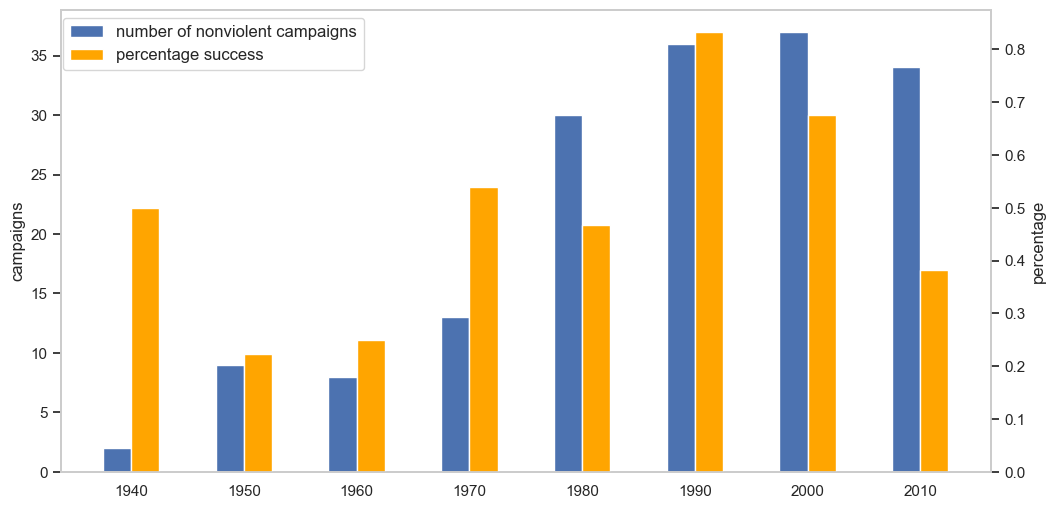

In [48]:

width = 2.5  # the width of the bars
x = merged_df['DECADE'] # SETTING THE X AXIS AS THE DECADES
y1 = merged_df['total_count'] # SETTING THE Y1 AXIS AS THE TOTAL COUNT
y2 = merged_df['success_percentage'] # SETTING THE Y2 AXIS AS THE SUCCESS PERCENTAGE

fig = plt.figure(figsize=[12,6]) # SETTING THE FIGURE SIZE
ax1 = fig.add_subplot(111) # SETTING THE SUBPLOT
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax1.bar(x - width/2, y1, width, color='b', label='number of nonviolent campaigns') # PLOTTING THE BAR CHART 1
ax1.grid(False) # REMOVING THE GRID
ax1.set_ylabel('campaigns') # SETTING THE Y1 LABEL
ax2.set_ylabel('percentage') # SETTING THE Y2 LABEL
ax2.bar(x + width/2, y2, width, color='orange', label='percentage success') # PLOTTING THE BAR CHART 2
ax2.grid(False) # REMOVING THE GRID

fig.legend(bbox_to_anchor=(0.12, 0.88), loc='upper left', fontsize=12) # SETTING THE LEGEND

plt.show()

For the first part of the 3rd plot we do exactly as above but despite of the non violent, this time we are doing it for the violent campaigns.

In [49]:
success_by_decade2 = df[(df['SUCCESS'] == 1) & (df['VIOL'] == 1)]
success_by_decade2 = success_by_decade2.groupby('DECADE').size().reset_index(name='success_count')

total_by_decade2 = df[(df['VIOL'] == 1)]
total_by_decade2 = total_by_decade2.groupby('DECADE').size().reset_index(name='total_count')

merged_df2 = pd.merge(total_by_decade2, success_by_decade2, on='DECADE', how='left').fillna(0)
merged_df2['success_percentage'] = (merged_df2['success_count'] / merged_df2['total_count'])

Now we only need to plot the bar by setting the y1 and y2 axis as the percentages of the non violent and violent campaigns and the x axis the decades.

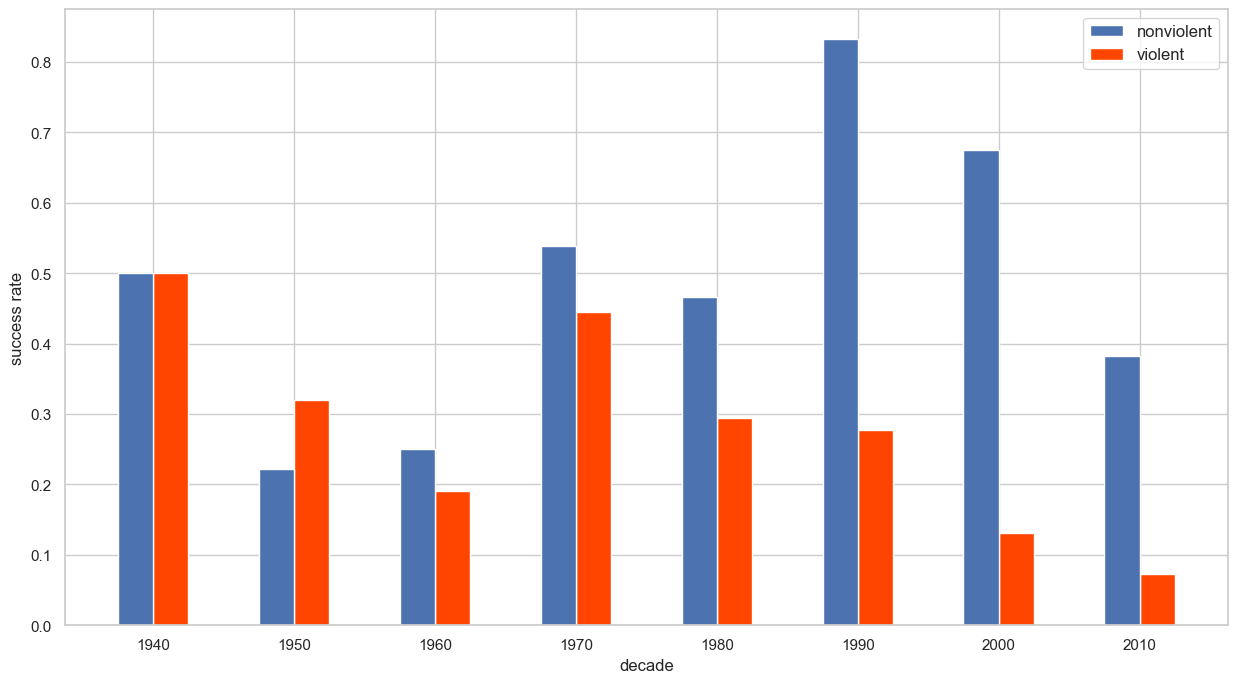

In [50]:
width = 2.5  # the width of the bars
fig = plt.figure(figsize=[15,8]) # SETTING THE FIGURE SIZE
x = merged_df2['DECADE'] # SETTING THE X AXIS AS THE DECADES
y1 = merged_df2['success_percentage'] # SETTING THE Y1 AXIS AS THE SUCCESS PERCENTAGE OF VIOLENT CAMPAIGNS
y2 = merged_df['success_percentage'] # SETTING THE Y2 AXIS AS THE SUCCESS PERCENTAGE OF NONVIOLENT CAMPAIGNS
ax = fig.add_subplot(111) # SETTING THE SUBPLOT
b2 = ax.bar(x + width/2, y1, width, color='orangered') # PLOTTING THE BAR CHART 1
b1 = ax.bar(x - width/2, y2, width, color='b') # PLOTTING THE BAR CHART 2
plt.xlabel('decade') # SETTING THE X LABEL
plt.ylabel('success rate') # SETTING THE Y LABEL
ax.legend((b1[0], b2[0]), ('nonviolent', 'violent'), fontsize=12) # SETTING THE LEGEND

plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

First of all we need to filter the campagins whee the population is at least 2%, we do that and save it to a new dataframe called `filtered_df`

In [51]:
# Filter campaigns with participation percentage at least 2.0%
filtered_df = df[df['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02]

Now all we need to do before creating the plot is sorting the dataframe by the percentage of participation in descending order and multiplying the percentage column with 100 so we can get it to the right format to match the example numbers in the plot given.

In [52]:
# Sort the DataFrame by participation percentage in descending order
sorted_df = filtered_df.sort_values(by='PERCENTAGE POPULAR PARTICIPATION', ascending=False)
sorted_df['PERCENTAGE POPULAR PARTICIPATION'] = sorted_df['PERCENTAGE POPULAR PARTICIPATION'] * 100.0

Now all we need to do is create the plot.

 * We create the barplot by setting our x axis to the percentage and the y axis to the location and target as one string (to match the example) and set its color as black. (stock color of bar)
 
 * In the for loop we set the text for the numbers showing in each bar.We also set the color of each bar based of if they were limited, successful or unsuccessful.

 * Then we just set the labels, use the gca so we can manipulate the percentages in the x-axis. (0.0%, 10.0%, etc.)

 * and finally, we create a custom legend for the plot.


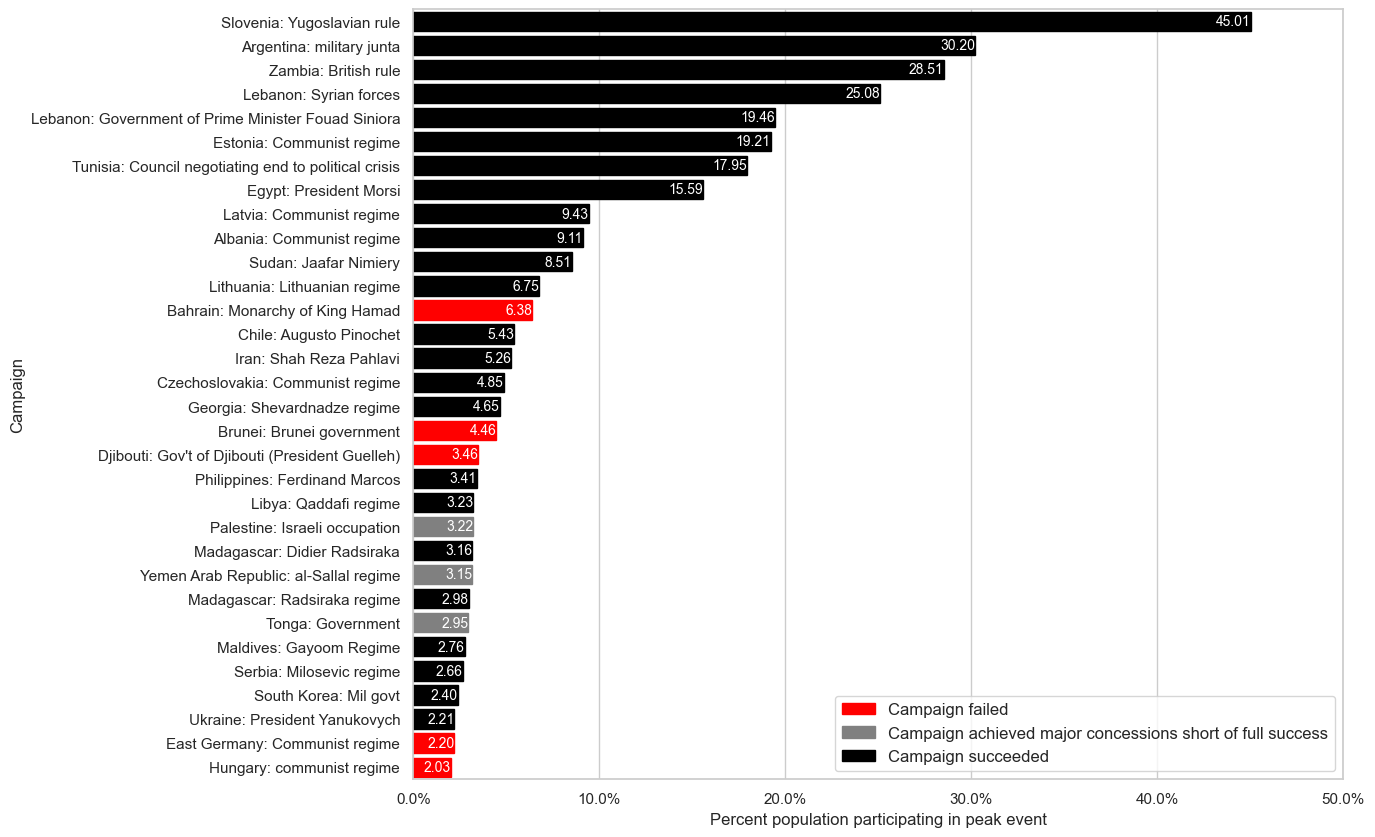

In [53]:
plt.figure(figsize=(12, 10)) # SETTING THE FIGURE SIZE

ax = sns.barplot(x=sorted_df['PERCENTAGE POPULAR PARTICIPATION'], y=sorted_df['LOCATION']+': '+sorted_df['TARGET'], data=sorted_df, color='black') # PLOTTING THE BAR CHART

for bar, values,success,limited in zip(ax.patches, sorted_df['PERCENTAGE POPULAR PARTICIPATION'],sorted_df['SUCCESS'],sorted_df['LIMITED']): # SETTING THE TEXT ON THE BAR CHART AND COLORING THE BARS
    text_x = bar.get_width() # SETTING THE TEXT X AXIS
    text_y = bar.get_y() + bar.get_height() / 2 # SETTING THE TEXT Y AXIS
    text = '{:.2f}'.format(values) # SETTING THE TEXT
    ax.text(text_x, text_y, text, ha='right', va='center', fontsize=10,color='white') # SETTING THE TEXT PARAMETERS
    if  limited == 1: 
        bar.set_color('grey') # SETTING THE COLOR OF THE BAR IF THE CAMPAIGN ACHIEVED MAJOR CONCESSIONS SHORT OF FULL SUCCESS
    elif success == 0:
        bar.set_color('red') # SETTING THE COLOR OF THE BAR IF THE CAMPAIGN FAILED
    else:
        bar.set_color('black')  # SETTING THE COLOR OF THE BAR IF THE CAMPAIGN SUCCEEDED

plt.xlabel('Percent population participating in peak event') # SETTING THE X LABEL
plt.ylabel('Campaign') # SETTING THE Y LABEL
plt.xlim(0, 50) # SETTING THE X LIMIT
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.1f}%'.format)) # SETTING THE X AXIS FORMAT

# Create a custom legend
legend_labels = ['Campaign failed','Campaign achieved major concessions short of full success','Campaign succeeded'] # SETTING THE LEGEND LABELS
legend_colors = ['red','grey','black'] # SETTING THE LEGEND COLORS
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color, linewidth=1) for color in legend_colors] # SETTING THE LEGEND ELEMENTS
plt.legend(legend_elements, legend_labels, title='', loc='lower right', fontsize=12) # SETTING THE LEGEND PARAMETERS

plt.show() # DISPLAYING THE PLOT

## And now some information about one of the most well-known Greek Resistance Campaigns

The resistance against the military junta in Greece (1967-1974) was a period of intense political and social struggle against the authoritarian regime that had seized power through a coup d'état on April 21, 1967.

#### Background:

The military junta, also known as the Regime of the Colonels, was led by a group of military officers headed by Colonel George Papadopoulos. The junta suspended civil liberties, dissolved political parties, censored the media, and established a repressive regime that suppressed dissent.

<img src='R.jpg' height = 200px>

#### Opposition Movements:

The resistance to the junta took various forms and involved a wide range of groups and individuals. Opposition was not limited to a single faction but included students, intellectuals, left-wing activists, and even some conservative elements that opposed the military rule.

One of the most significant events of the resistance occurred in November 1973 at the Athens Polytechnic University. Students staged a massive protest against the junta, demanding an end to the dictatorship and the restoration of democracy. The junta responded with a brutal crackdown, sending in the military to suppress the uprising. The exact number of casualties remains disputed, but the event marked a turning point and increased opposition to the regime both domestically and internationally.

<img src='novmb1704.jpg'>

#### End of the Junta (1974):

The junta's rule came to an end in July 1974 following the Cyprus conflict. A failed attempt by the junta to overthrow the Archbishop Makarios III, the leader of Cyprus, led to the Turkish invasion of Cyprus. This event weakened the junta's position, and civilian unrest in Greece escalated. On July 23, 1974, the junta collapsed, leading to the restoration of democracy in Greece.

#### Legacy:

The resistance against the military junta is remembered as a pivotal moment in Greek history. The sacrifices made by those who opposed the dictatorship are commemorated annually, especially the events at the Athens Polytechnic University. The struggle against the junta left a lasting impact on Greek society and contributed to a renewed commitment to democratic values and human rights.

The period of the military junta and its subsequent downfall shaped the political landscape of Greece in the years that followed, with a lasting impact on the country's commitment to democracy and political pluralism.


## 3. The Effect of Participation on the Probability of Campaign Success

First of all what we have to do is get the columns that we will e=need for this plot from the initial dataframe and copy them to a new one so we will be able to manipulate it without altering the original one while only having the columns we need. (for simplicity and better readability)

In [54]:
scatter_df = df[['SUCCESS', 'PARTICIPATION', 'PERCENTAGE POPULAR PARTICIPATION']].copy()

Now given the columns we have we will need to calculate the population and the logs that we need. 

In [55]:
scatter_df['POPULATION'] = scatter_df['PARTICIPATION'] / scatter_df['PERCENTAGE POPULAR PARTICIPATION'] # calculate population

scatter_df['LOGPOP'] = np.log(scatter_df['POPULATION']) # log population

scatter_df['LOGPART'] = np.log(scatter_df['PARTICIPATION']) # log participation number

scatter_df['MEMPC'] = scatter_df['LOGPART'] / scatter_df['LOGPOP'] # log of these two variables

Now that we have prepared our dataframe there's one last thing to check, for NaN. (missing values)

In [56]:
missing_values = scatter_df.isnull().sum()
display(missing_values)

SUCCESS                             0
PARTICIPATION                       9
PERCENTAGE POPULAR PARTICIPATION    0
POPULATION                          9
LOGPOP                              9
LOGPART                             9
MEMPC                               9
dtype: int64

Since we have missing values we will have to use `dropna()` to drop them.

In [57]:
scatter_df = scatter_df.dropna(how='any',axis=0)

missing_values = scatter_df.isnull().sum()
display(missing_values)

SUCCESS                             0
PARTICIPATION                       0
PERCENTAGE POPULAR PARTICIPATION    0
POPULATION                          0
LOGPOP                              0
LOGPART                             0
MEMPC                               0
dtype: int64

Now we will make a copy of the dataframe we just created, so we won't have to redo all that stuff again from 0 for the next plot.

In [58]:
scatter_linear_df = scatter_df.copy()

And now we will do the binary logistic regression with the use of logit

In [59]:
linear_success = logit("SUCCESS ~ MEMPC + LOGPOP", scatter_linear_df).fit() # fit the model
linear_success.summary2() # display the summary

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.130     
Date:               2023-12-04 17:21 AIC:              447.3747  
No. Observations:   380              BIC:              459.1952  
Df Model:           2                Log-Likelihood:   -220.69   
Df Residuals:       377              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      5.1893e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.8142    1.4961  -1.8811  0.0600  -5.7465  0.1180
MEMPC           7.6475    1.1664   6.5563  0.0000   5.3613  9.9336
LOGPOP         -0.1388    0.0736  -1.8871  0.0591  -0.2830  0.0054
=================================================================

"""

Now that everything is done its time to create the plot.

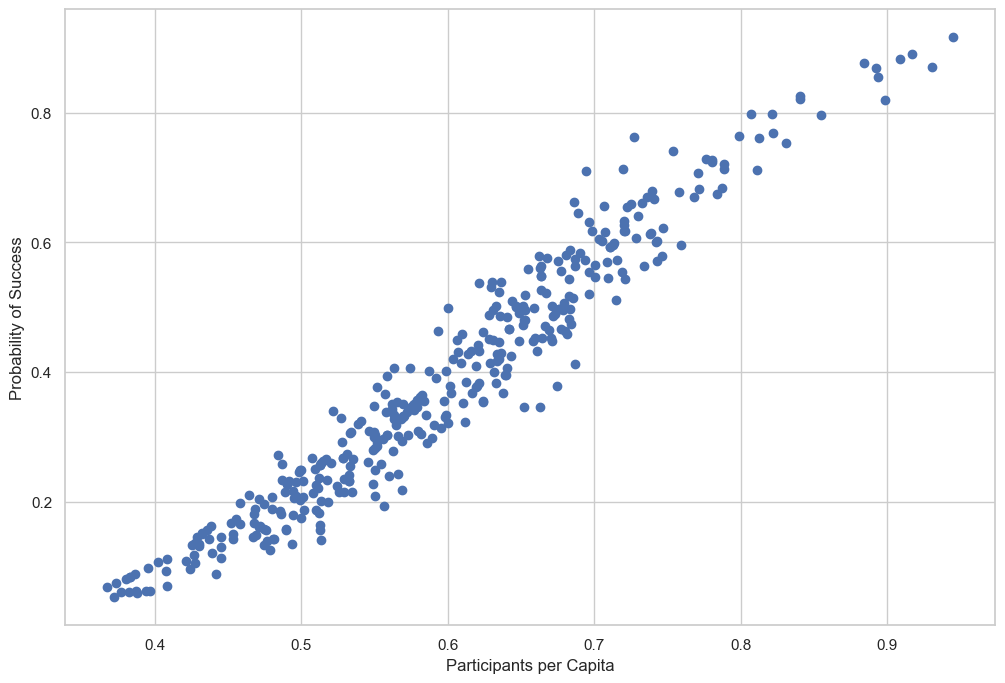

In [60]:
X = scatter_df[['MEMPC', 'LOGPOP']] # set the independent variables
y_prob = 1 / (1 + np.exp(-linear_success.fittedvalues))  # calculate the probability of success, set the dependent variable
x = X.iloc[:, 0] # set the x axis

plt.figure(figsize=[12, 8]) # set the figure size
plt.scatter(x, y_prob) # plot the scatter plot
plt.ylabel('Probability of Success', fontsize=12) # set the y label
plt.xlabel('Participants per Capita', fontsize=12)  # set the x label

plt.show() # display the plot



For this plot once again we will copy the scatter dataframe to a new one named `scatter_linear_df2`

In [61]:
scatter_linear_df2 = scatter_df.copy()

And now once again we will do the binary logistic regression with the use of logit.

In [62]:
linear_success_mempc = logit("SUCCESS ~ MEMPC", scatter_linear_df2).fit()

# Display the summary of the logistic regression model
linear_success_mempc.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.123     
Date:               2023-12-04 17:21 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
MEMPC          8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

Now that all is done it's time to create the plot.

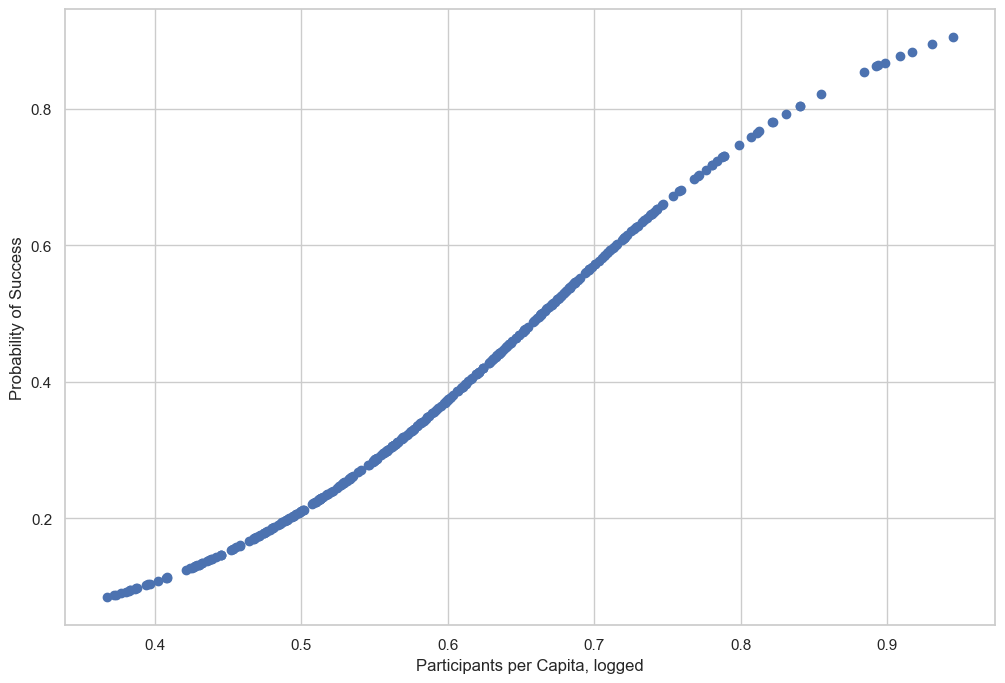

In [63]:
X_mempc = scatter_df[['MEMPC']] # set the independent variable
y_prob_mempc = 1 / (1 + np.exp(-linear_success_mempc.fittedvalues)) # calculate the probability of success, set the dependent variable

# Create the new scatter plot
plt.figure(figsize=[12, 8]) # set the figure size
plt.scatter(X_mempc, y_prob_mempc) # plot the scatter plot
plt.ylabel('Probability of Success', fontsize=12) # set the y label
plt.xlabel('Participants per Capita, logged', fontsize=12)  # set the x label

plt.show()  # display the plot

## 4. The Level of Participation Tipping Point

First of all, we create a new df by selecting and copying only the columns we will need from the initial one.

In [64]:
new_df = df[['SUCCESS', 'PARTICIPATION', 'PERCENTAGE POPULAR PARTICIPATION', 'CAMPAIGN']].copy()

display(new_df.head())

,SUCCESS,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,CAMPAIGN
0,1,900000.0,0.450129,Slovenian independence
1,1,9000000.0,0.302013,pro-democracy movement
2,1,1000000.0,0.285063,Zambian independence movement
3,1,1000000.0,0.250824,Cedar Revolution
4,1,800000.0,0.194598,Lebanon Political Crisis


As we can tell, the percentage popular participationg is not in the % value but as a decimal (Not 45% but 0.45). 

So, for our calculation purposes we will multiply these columns with 100, so we won't get mixed up with the decimals, but also for presantation purposes later on.

In [65]:
new_df['PERCENTAGE POPULAR PARTICIPATION'] = new_df['PERCENTAGE POPULAR PARTICIPATION'] * 100.0

display(new_df.head())

,SUCCESS,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,CAMPAIGN
0,1,900000.0,45.012851,Slovenian independence
1,1,9000000.0,30.201342,pro-democracy movement
2,1,1000000.0,28.506271,Zambian independence movement
3,1,1000000.0,25.082446,Cedar Revolution
4,1,800000.0,19.459763,Lebanon Political Crisis


The next thing we need to do is create the bins and label them. We will start by 0.0001 because we do not want 0 included in our calculations. The rest are just like the ones showed in the example. (`float(inf)` is for the infinite)

In [66]:
# Define the bins for categorization
bins = [0.0001, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, float('inf')]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

Now we will use the `cut` method of pandas to separate our data based on the percentages of data and on the bins that were created above. We will also create a new column where these labels will go.  

In [67]:
# Categorize the data based on the specified bins
new_df['Peak Popular Participation (%)'] = pd.cut(new_df['PERCENTAGE POPULAR PARTICIPATION'], bins=bins, labels=labels, right=False)

display(new_df.head())

,SUCCESS,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,CAMPAIGN,Peak Popular Participation (%)
0,1,900000.0,45.012851,Slovenian independence,greater than 3.5%
1,1,9000000.0,30.201342,pro-democracy movement,greater than 3.5%
2,1,1000000.0,28.506271,Zambian independence movement,greater than 3.5%
3,1,1000000.0,25.082446,Cedar Revolution,greater than 3.5%
4,1,800000.0,19.459763,Lebanon Political Crisis,greater than 3.5%


The next thing that we will need to do is group by our data based on their label (`Peak Popular Participation (%)`) and calculate the sum of success and the amount of campaigns. The amount of campaigns will be our Observations and by diving the sum with it, we will be able to get the Success Rate. We will also set an if Statement if there is any Observations for each Peak Popular Participation, so we won't be dividing with 0 if there is none.

In [68]:
# Group by the Participation Category and calculate the observations and success rate
result = new_df.groupby('Peak Popular Participation (%)').agg({'SUCCESS': 'sum', 'CAMPAIGN': 'count'}).reset_index()

# Handle zero counts to prevent division by zero
result['Success Rate'] = result.apply(lambda row: (row['SUCCESS'] / row['CAMPAIGN']) * 100 if row['CAMPAIGN'] != 0 else 0, axis=1)

display(result)

,Peak Popular Participation (%),SUCCESS,CAMPAIGN,Success Rate
0,less than 0.0035%,1,24,4.166667
1,0.0035% - 0.015%,4,44,9.090909
2,0.015% - 0.06%,16,66,24.242424
3,0.06% - 0.25%,43,95,45.263158
4,0.25% - 1.0%,42,92,45.652174
5,1.0% - 3.5%,25,41,60.975610
6,greater than 3.5%,16,18,88.888889


Now the only things left to do to match the example are:

* Rename the columns

* keeping only the columns needed for the presentation

* Round the Success Rate to 2 decimals and make it as a string so we can add the % symbol

* sort the data based on the bins in descending order

In [69]:
# Rename columns and format the output
result = result.rename(columns={'CAMPAIGN': 'Observations'})
result = result[['Peak Popular Participation (%)', 'Observations', 'Success Rate']]
result['Success Rate'] = result['Success Rate'].round(2).astype(str) + '%'

result = result.sort_values(by='Peak Popular Participation (%)', ascending=False).reset_index(drop=True)

# Display the result
display(result)

,Peak Popular Participation (%),Observations,Success Rate
0,greater than 3.5%,18,88.89%
1,1.0% - 3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


Now that all of this is done, it's time to move on with the 2nd part in this question.

For this part we will use the logistic regression that we did for the 2nd plot in the previous question. Let's see it again.

In [70]:
linear_success_mempc.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.123     
Date:               2023-12-04 17:21 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
MEMPC          8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

Now what we will do is combine `X` and `y_prob` into a single dataframe and sort it.

In [71]:
# Combine X, y_prob into a DataFrame for sorting
sorted_data = pd.DataFrame({'X': X['MEMPC'], 'y_prob': y_prob})
sorted_data = sorted_data.sort_values(by='X')

The only thing now left to do is create the plot:

* We will create a lineplot for the line of the graph

* We will get the confidence interval from the `linear_success_mempc`

* With that confidence interval known we will calculate the lower bound and upper bound of the confidence interval, to use in `fill_between`

* And finally add the labels and the axhline for the 99%


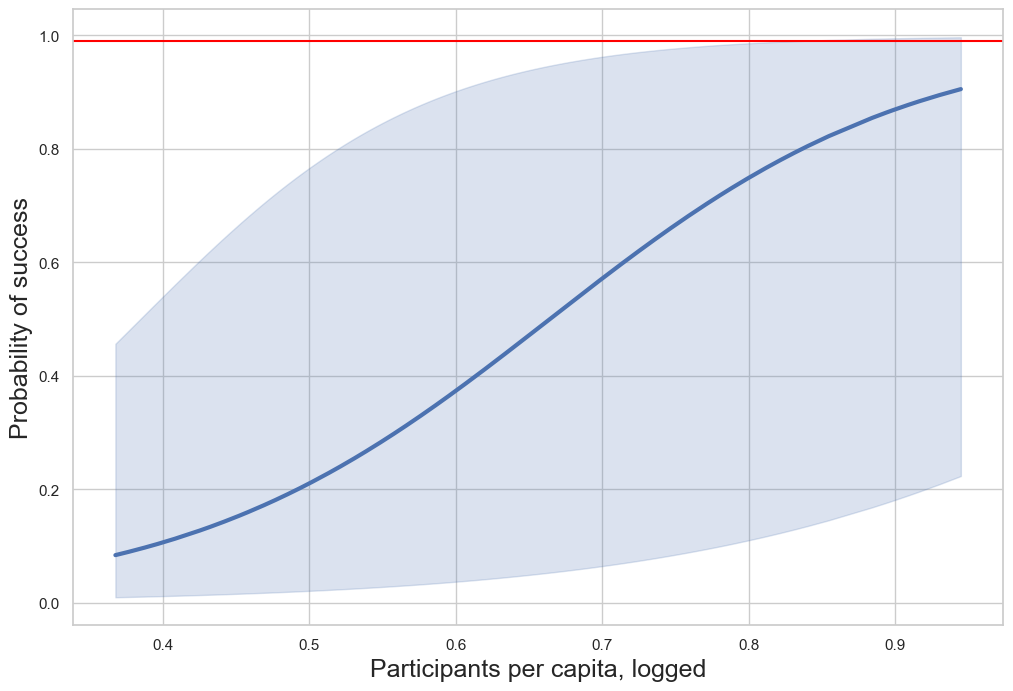

Tipping point for success (99% probability): 0.8403388124273167
Percentage of participants at tipping point: 6.923709095950988 %


In [86]:
# Predict the probabilities
X = scatter_df[['MEMPC']] # set the independent variable
y_prob = 1 / (1 + np.exp(-linear_success_mempc.fittedvalues)) # calculate the probability of success, set the dependent variable

# Combine X, y_prob into a DataFrame for sorting
sorted_data = pd.DataFrame({'X': X['MEMPC'], 'y_prob': y_prob}) # combine X, y_prob into a DataFrame for sorting
sorted_data = sorted_data.sort_values(by='X') # sort the DataFrame by X

plt.figure(figsize=[12, 8]) # set the figure size

# Use sns.lineplot to plot the line
sns.lineplot(x=sorted_data['X'], y=sorted_data['y_prob'],linewidth=3) 

conf_int = linear_success_mempc.conf_int() # get the confidence interval

sorted_data['ci_lower'] = 1 / (1 + np.exp(-(conf_int.iloc[0, 0] + conf_int.iloc[1, 0] * sorted_data['X']))) # calculate the lower bound of the confidence interval
sorted_data['ci_upper'] = 1 / (1 + np.exp(-(conf_int.iloc[0, 1] + conf_int.iloc[1, 1] * sorted_data['X']))) # calculate the upper bound of the confidence interval
# Add a shaded confidence interval
plt.fill_between(sorted_data['X'], (sorted_data['ci_lower']), (sorted_data['ci_upper']), color='b', alpha=.2) # add a shaded confidence interval

plt.ylabel('Probability of success', fontsize=18)
plt.xlabel('Participants per capita, logged', fontsize=18)
plt.axhline(y=0.99, color='red')

plt.show()

Now that we have the graph we can clearly see the tipping point of success approximately at 0.8, but for better results we will actually code it to get the exact results.

What we have to do is find the first x that touches the 99 probability and get its value and we do like this:

In [87]:
# Find the index where the probability first crosses 0.99
index_tipping_point = (sorted_data['ci_upper'] >= 0.99).idxmax()

# Get the X value at the tipping point
x_tipping_point = sorted_data.loc[index_tipping_point, 'X']

display(x_tipping_point)

0.8403388124273167

And we just add some prints for better understanding of what they show:

In [91]:
print("Tipping point for success (99% probability):", x_tipping_point)

print("Percentage of participants at tipping point:", 10**x_tipping_point, "%")

Tipping point for success (99% probability): 0.84
Percentage of participants at tipping point: 6.92 %


Also, we will keep only 2 decimals for better presentation.

In [ ]:
print("Tipping point for success (99% probability):", x_tipping_point.round(2))

print("Percentage of participants at tipping point:", (10**x_tipping_point).round(2), "%")

So, to reach the tipping point of success in a campaign with 99% probability all that is required is 6.92% of people to participate in it!

## 5. Nonviolent Resistance and Target Regime Type

The first thing we need to do is read the new xls file that we will need and save it as a new datagrame called p5_df. From this dataframe we will be able to get the polity.

In [73]:
p5_df = pd.read_excel('p5v2018.xls')
display(p5_df)

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17569,1,5522014,552,ZIM,Zimbabwe,2014,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17570,1,5522015,552,ZIM,Zimbabwe,2015,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17571,1,5522016,552,ZIM,Zimbabwe,2016,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17572,1,5522017,552,ZIM,Zimbabwe,2017,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Then we need to merge this new dataframe with the initial one so we can have the polity for each country per end year. 

In [74]:
# Merge based on 'EndYear' and 'Country'
merged_df = pd.merge(df, p5_df, how='inner', left_on=['EYEAR', 'LOCATION'], right_on=['year', 'country'])

display(merged_df.head())

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,205,Slovenian independence,Slovenia,1990,1991,Yugoslavian rule,1,0,0,0,...,NaN,6.0,25.0,1991.0,1.0,10.0,99.0,1.0,NaN,99.0
1,33,pro-democracy movement,Argentina,1977,1983,military junta,1,0,0,0,...,-8.0,10.0,31.0,1983.0,1.0,8.0,17.0,1.0,NaN,3.0
2,53,Cedar Revolution,Lebanon,2005,2005,Syrian forces,1,0,0,0,...,-66.0,4.0,28.0,2005.0,1.0,6.0,1.0,1.0,NaN,0.0
3,321,Lebanon Political Crisis,Lebanon,2006,2008,Government of Prime Minister Fouad Siniora,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202,Singing Revolution,Estonia,1987,1991,Communist regime,1,0,0,0,...,NaN,9.0,6.0,1991.0,1.0,6.0,99.0,1.0,NaN,99.0


and now we will drop the unneccessary year column since it's literally the same as EYEAR.

In [75]:
# Drop the duplicate 'Year' column if needed
merged_df = merged_df.drop(columns=['year'])

display(merged_df.head())

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,205,Slovenian independence,Slovenia,1990,1991,Yugoslavian rule,1,0,0,0,...,NaN,6.0,25.0,1991.0,1.0,10.0,99.0,1.0,NaN,99.0
1,33,pro-democracy movement,Argentina,1977,1983,military junta,1,0,0,0,...,-8.0,10.0,31.0,1983.0,1.0,8.0,17.0,1.0,NaN,3.0
2,53,Cedar Revolution,Lebanon,2005,2005,Syrian forces,1,0,0,0,...,-66.0,4.0,28.0,2005.0,1.0,6.0,1.0,1.0,NaN,0.0
3,321,Lebanon Political Crisis,Lebanon,2006,2008,Government of Prime Minister Fouad Siniora,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202,Singing Revolution,Estonia,1987,1991,Communist regime,1,0,0,0,...,NaN,9.0,6.0,1991.0,1.0,6.0,99.0,1.0,NaN,99.0


And now we will calculate the population and the logs that are needed.

In [76]:
merged_df['POPULATION'] = merged_df['PARTICIPATION'] / merged_df['PERCENTAGE POPULAR PARTICIPATION'] # calculate population

merged_df['LOGPOP'] = np.log(merged_df['POPULATION']) # log population

merged_df['LOGPART'] = np.log(merged_df['PARTICIPATION']) # log participation number

For simplicity purposes we will filter the dataframe by keeping only the columns we need.

In [77]:
filtered_df = merged_df[['SUCCESS','NONVIOL','polity','LOGPART','LOGPOP']]

display(filtered_df.head())

,SUCCESS,NONVIOL,polity,LOGPART,LOGPOP
0,1,1,10,13.710150,14.508372
1,1,1,8,16.012735,17.210019
2,1,1,6,13.815511,15.198513
3,1,1,6,13.592367,15.229188
4,1,1,6,12.611538,14.261038


The last thing left to do before running our logistic regression is to check for NaN and if there is any drop them

In [78]:
percent_missing = filtered_df.isnull().sum() * 100 / len(filtered_df)
display(percent_missing)

SUCCESS    0.00000
NONVIOL    0.00000
polity     0.00000
LOGPART    2.24359
LOGPOP     2.24359
dtype: float64

As we can tell from the output above there is some missing in LOGPART and LOGPOP so we will drop them.

In [79]:
filtered_df = filtered_df.dropna(how='any',axis=0)

percent_missing = filtered_df.isnull().sum() * 100 / len(filtered_df)
display(percent_missing)

SUCCESS    0.0
NONVIOL    0.0
polity     0.0
LOGPART    0.0
LOGPOP     0.0
dtype: float64

And now that we have our dataframe ready it's time to run our binary logistic regression like so:

In [80]:
log_df = logit("SUCCESS ~ NONVIOL + polity + LOGPART + LOGPOP",filtered_df).fit()
log_df.summary2()

Optimization terminated successfully.
         Current function value: 0.542765
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.194     
Date:               2023-12-04 17:21 AIC:              341.0868  
No. Observations:   305              BIC:              359.6883  
Df Model:           4                Log-Likelihood:   -165.54   
Df Residuals:       300              LL-Null:          -205.27   
Converged:          1.0000           LLR p-value:      2.2774e-16
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      1.2494    1.5079   0.8286  0.4073  -1.7060   4.2049
NONVIOL        0.9251    0.2868   3.2253  0.0013   0.3629   1.4873
polity        -0.0094    0.0040  -2.3393  0.0193  -0.0173  -0.0015
LOGPART        0.4256    0.0873   4.8738  0.0000   0.2545   0.5968
LOGPOP        -0.3941    0.0988  -3.9895  0.0001  -0.5877  -0.2005
=================================================================

"""

# EXPLAIN